In [1]:
#Description
# Boston dataset consists of 506 rows and 15 columns

In [2]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
import sklearn.model_selection as ms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

pd.options.display.max_rows = 14

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [24]:
def splitting(a,b):
    split = ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for training_indices, test_indices in split.split(housing, income_categories):
        stratified_train_set = housing.loc[training_indices]
        stratified_test_set = housing.loc[test_indices]
    return stratified_train_set,stratified_test_set
def mean(a,b):
    return np.sqrt(mean_squared_error(a,b))
def crossva(a,b,c):
    p = cross_val_score(a,b,c,scoring='neg_mean_squared_error',cv=10)
    return np.mean(np.sqrt(-p))

In [4]:
housing = pd.read_csv('bostonhousing.csv')
housing.head()

ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [5]:
housing.shape

(506, 15)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
ID         506 non-null int64
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [7]:
housing.describe()

ID        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677082   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.148861    2.105710    8.707259  168.537116    2.164946   
min      3.561000    2.900000    1.129600    1.000000  187.000000   12.600000   
25%      5.885500   45.025000    2.100175    4.000000  279.000000   17.400000   
50%      6.208500   77.500000    3.207450    5.000000  330.000000   19.050000   
75%      6.623500   94.075000    5.188425   24.000000  666.000000   20.200000   
max      8.780000  100.000000   12.126500   24.000000  711.000000   22.000000   

            black       lstat        medv  
count  506.000000  506.000000  506.000000  
mean   356.674032   12.653063   22.532806  
std     91.294864    7.141062    9.197104  
min      0.320000    1.730000    5.000000  
25%    375.377500    6.950000   17.025000  
50%    391.440000   11.360000   21.200000  
75%    396.225000   16.955000   25.000000  
max    396.900000   37.970000   50.000000

In [8]:
# lstat attribute is scaled between 1 t0 37
# medv maximum value is 50
# medv minimum value is 5

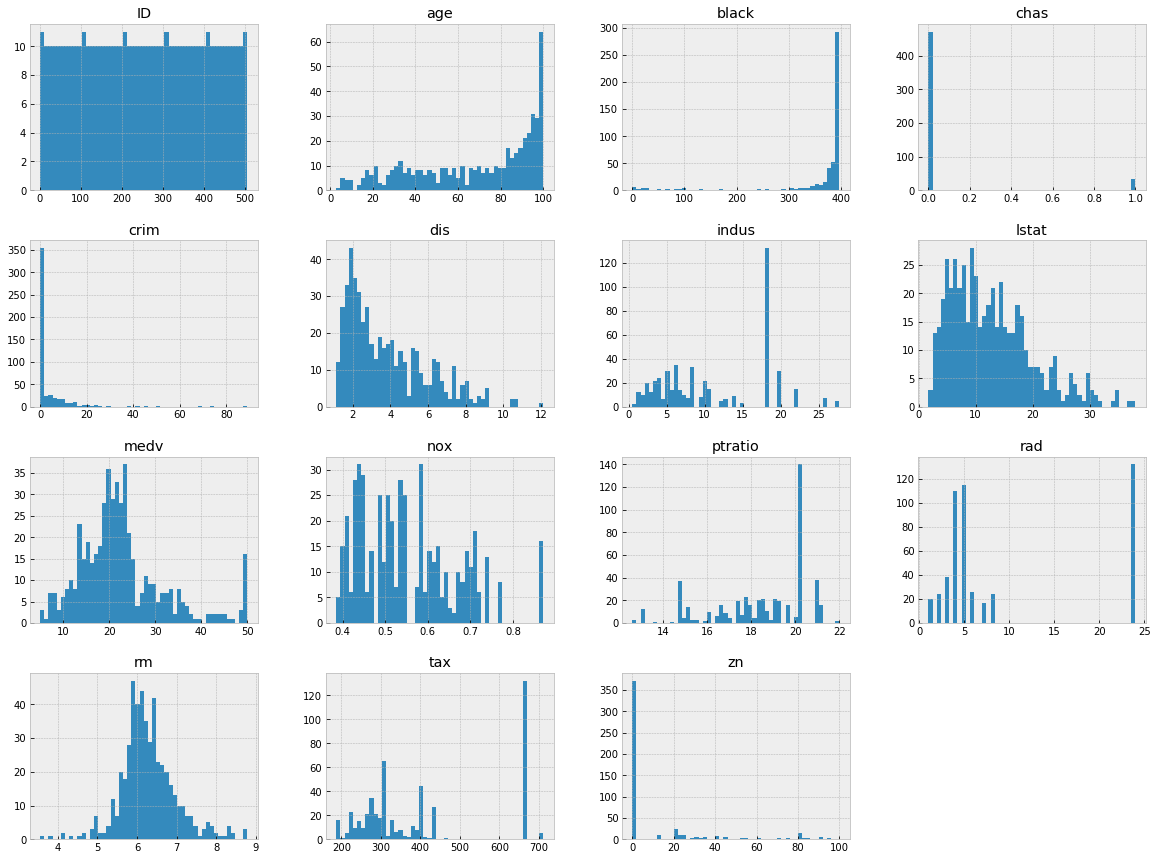

In [9]:
x = housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [10]:
income_categories = housing['lstat'] // 2.5
income_categories[income_categories >= 5] = 5
income_categories.value_counts()

5.0    226
2.0     80
3.0     77
4.0     61
1.0     58
0.0      4
Name: lstat, dtype: int64

In [ ]:
splitting(housing,income_categories)

In [42]:
housing_features = stratified_train_set.drop('medv', axis=1)

NameError: name 'stratified_train_set' is not defined

In [19]:
housing_labels = stratified_train_set.medv.copy()

NameError: name 'stratified_train_set' is not defined

In [ ]:
%run 'class.py.ipynb'
pipeline = Pipeline([('selector', ColumnSelector(list(housing_features))),
                                  ('standard_scaler', StandardScaler())
                                 ])

housing_transformed = pipeline.fit_transform(stratified_train_set)
housing_transformed.shape
housing_transformed

In [ ]:
#linear regression
lin_reg = LinearRegression()
x = lin_reg.fit(housing_transformed, housing_labels)
housing_predictions = lin_reg.predict(housing_transformed)
a1=mean(housing_labels,housing_predictions)
b1=r2_score(housing_labels,housing_predictions)
c1=crossva(lin_reg, housing_transformed, housing_labels)
print(a1,b1,c1)

#DecisionTree Regressor
dt_reg = DecisionTreeRegressor()
x = dt_reg.fit(housing_transformed, housing_labels)
housing_predictions2 = dt_reg.predict(housing_transformed)
a2=mean(housing_labels, housing_predictions2)
b2=r2_score(housing_labels, housing_predictions2)
c2=crossva(dt_reg, housing_transformed, housing_labels)
print(a2,b2,c2)

#RandomForestRegressor
rf_reg = RandomForestRegressor()
x = rf_reg.fit(housing_transformed, housing_labels)
housing_predictions3 = rf_reg.predict(housing_transformed)
a3=mean(housing_labels, housing_predictions3)
b3=r2_score(housing_labels, housing_predictions3)
c3=crossva(rf_reg, housing_transformed, housing_labels)
print(a3,b3,c3)

In [ ]:
# while comparing three methods Randomforestregressor is the best method

# Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [40,50,60,70,80], 'max_features': [2,3,4,5,6]},
       #{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
    ]
rf_reg2 = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg2, param_grid, cv=3, scoring='neg_mean_squared_error')

x = grid_search.fit(housing_transformed, housing_labels)

grid_search.best_params_
print('done')

In [ ]:
grid_search.best_estimator_

In [ ]:
final_model = grid_search.best_estimator_

X_test = stratified_test_set.drop('medv', axis=1)
y_test = stratified_test_set['medv'].copy()

X_test_transformed = pipeline.transform(X_test)

predictions = final_model.predict(X_test_transformed)

test_mse = mean_squared_error(y_test, predictions)
a=np.sqrt(test_mse)
b=r2_score(y_test, predictions)
print(a,b)

# Randomsearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = { "max_features": sp_randint(1, 10),"n_estimators":sp_randint(1,100)}
rf_reg2 = RandomForestRegressor()

randomized_search = RandomizedSearchCV(rf_reg2, param_distributions=param_dist, cv=5, scoring='neg_mean_squared_error')

x = randomized_search.fit(housing_transformed, housing_labels)

randomized_search.best_params_
print('done')

In [ ]:
randomized_search.best_estimator_

In [ ]:
final_model = randomized_search.best_estimator_

X_test = stratified_test_set.drop('medv', axis=1)
y_test = stratified_test_set['medv'].copy()

X_test_transformed = pipeline.transform(X_test)

predictions = final_model.predict(X_test_transformed)

test_mse = mean_squared_error(y_test, predictions)
np.sqrt(test_mse)
r2_score(y_test, predictions)

In [ ]:
# CONCLUSION
# 